In [98]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

import generate as generate
from single_layer import *

## Experiment 1
- Data Generation: R1 -> R1, with only one activation unit
- model 
    - hidden_dim: [20]
    - lr: 0.01

In [100]:
# Constants
d = 1
N = 3#int(np.exp(d))
M = d 
num = 1
T = 1000

lr = 0.01
hidden_dim = [20]

(1, 1000, 1)
(1, 1000)


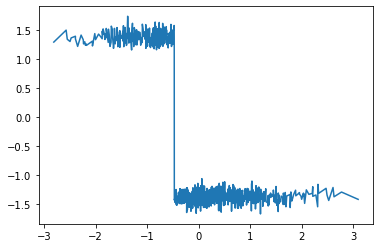

epochs: 1000, train loss: 0.02545778185594827 validation loss: 0.03888878598809242
epochs: 1000, train loss: 0.027593509759753942 validation loss: 0.03997974470257759
epochs: 1000, train loss: 0.0284132492961362 validation loss: 0.04446432739496231
epochs: 1000, train loss: 0.029117858153767884 validation loss: 0.044344302266836166
epochs: 1000, train loss: 0.027003180352039635 validation loss: 0.04223087430000305
epochs: 1000, train loss: 0.02954241633415222 validation loss: 0.045815762132406235
epochs: 1000, train loss: 0.02858531312085688 validation loss: 0.04435332864522934
epochs: 1000, train loss: 0.02912606217432767 validation loss: 0.044435955584049225
epochs: 1000, train loss: 0.028867673478089273 validation loss: 0.04420222342014313
epochs: 1000, train loss: 0.027017406653612852 validation loss: 0.04267841950058937


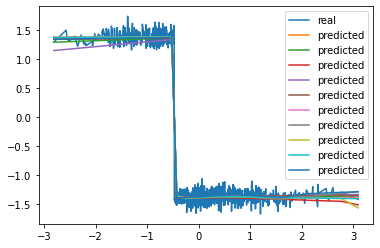

(1, 1000, 1)
(1, 1000)


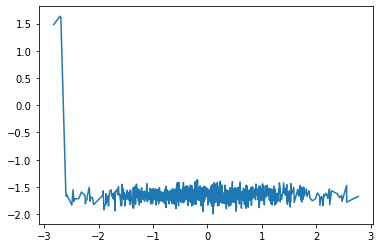

epochs: 151, train loss: 0.025702933664433658 validation loss: 0.017766181379556656
epochs: 111, train loss: 0.03111149708274752 validation loss: 0.014665992930531502
epochs: 108, train loss: 0.03031372104305774 validation loss: 0.012242598459124565
epochs: 108, train loss: 0.02966300887055695 validation loss: 0.01495433785021305
epochs: 119, train loss: 0.031909553217701614 validation loss: 0.014992297627031803
epochs: 117, train loss: 0.03276199719402939 validation loss: 0.014045989140868187
epochs: 111, train loss: 0.035306213540025055 validation loss: 0.01284534391015768
epochs: 107, train loss: 0.031401826767250896 validation loss: 0.012857399880886078
epochs: 113, train loss: 0.03442879824433476 validation loss: 0.015432381071150303
epochs: 110, train loss: 0.035583714954555035 validation loss: 0.01266496255993843


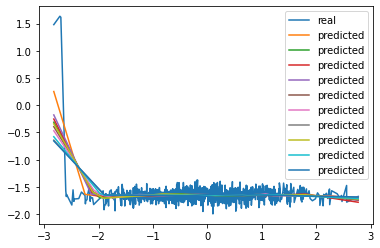

(1, 1000, 1)
(1, 1000)


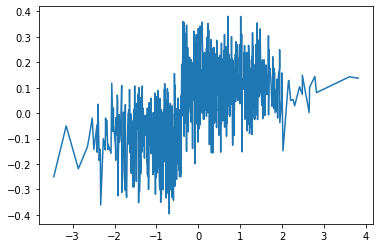

epochs: 407, train loss: 0.011044971644878387 validation loss: 0.009922591969370842
epochs: 1000, train loss: 0.010916257742792368 validation loss: 0.00949533935636282
epochs: 587, train loss: 0.010742262238636613 validation loss: 0.009812993928790092
epochs: 1000, train loss: 0.010966813541017473 validation loss: 0.009451860561966896
epochs: 533, train loss: 0.011304803658276796 validation loss: 0.010032761842012405
epochs: 1000, train loss: 0.011088261846452951 validation loss: 0.009515881538391113
epochs: 211, train loss: 0.01091788918711245 validation loss: 0.01001780480146408
epochs: 1000, train loss: 0.010960462968796492 validation loss: 0.00950080156326294
epochs: 679, train loss: 0.010799975134432316 validation loss: 0.009823293425142765
epochs: 1000, train loss: 0.010997817036695778 validation loss: 0.009563444182276726


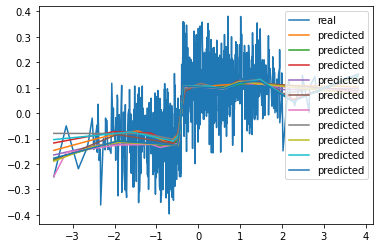

(1, 1000, 1)
(1, 1000)


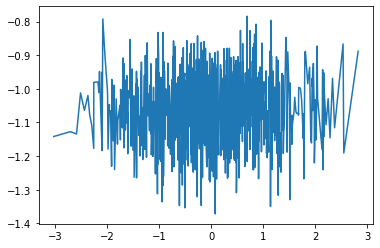

epochs: 245, train loss: 0.009627340012229979 validation loss: 0.010974062606692314
epochs: 144, train loss: 0.009552454459480941 validation loss: 0.01078325416892767
epochs: 144, train loss: 0.009485043119639158 validation loss: 0.0108488779515028
epochs: 120, train loss: 0.009579908568412066 validation loss: 0.010952522978186607
epochs: 141, train loss: 0.009543759166263044 validation loss: 0.010935737751424313
epochs: 139, train loss: 0.009592001093551517 validation loss: 0.010854532942175865
epochs: 114, train loss: 0.00960947957355529 validation loss: 0.010695374570786953
epochs: 114, train loss: 0.009468345786444843 validation loss: 0.010771413333714008
epochs: 200, train loss: 0.009563618572428823 validation loss: 0.010808444581925869
epochs: 110, train loss: 0.00951683463063091 validation loss: 0.010527241975069046


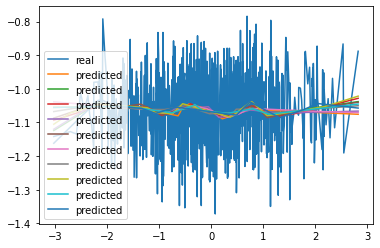

(1, 1000, 1)
(1, 1000)


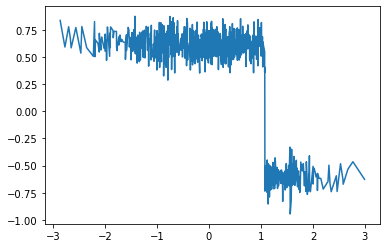

epochs: 1000, train loss: 0.012436557561159134 validation loss: 0.0165578443557024
epochs: 1000, train loss: 0.012351770652458072 validation loss: 0.016253743320703506
epochs: 1000, train loss: 0.012378476792946458 validation loss: 0.01635124348104
epochs: 1000, train loss: 0.01241010776720941 validation loss: 0.016114644706249237
epochs: 1000, train loss: 0.012194786220788956 validation loss: 0.016113759949803352
epochs: 1000, train loss: 0.01248875679448247 validation loss: 0.016660502180457115
epochs: 1000, train loss: 0.012487273663282394 validation loss: 0.01698419079184532
epochs: 1000, train loss: 0.011585697648115456 validation loss: 0.013921936973929405
epochs: 1000, train loss: 0.011458285967819393 validation loss: 0.014090759679675102
epochs: 1000, train loss: 0.01165890134871006 validation loss: 0.014153782278299332


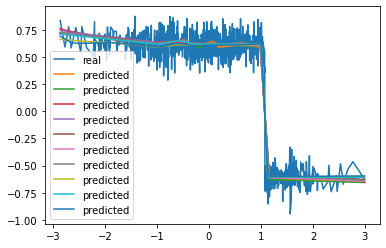

In [102]:
for _ in range(5):
    (an, bn) = generate.generate_activations(d, N)
    (In, thetan) = generate.generate_single_layer(N, M, d, num, an, bn)
    (X, Y) = generate.generate_single_data(T, an, bn, In, thetan)
    print(X.shape)
    print(Y.shape)
    plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
    plt.show()
    num_experiments = 10
    input = X[0]
    plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
    for i in range(num_experiments):
        (model, epoch_number, best_vloss, train_loss) = train_one_model(
            hidden_dim, X[0], Y[0], 
            val_ratio=0.2, 
            lr=lr, 
            patience=100, 
            epochs=1000,
        )
        print(f"epochs: {epoch_number}, train loss: {train_loss} validation loss: {best_vloss}")
        predicted = model(torch.Tensor(X[0])).detach().numpy()
        plt.plot(*zip(*sorted(zip(X[0], predicted))))
    plt.legend(["real"] + ["predicted"] * num_experiments)
    plt.show()


## Experiment 2
- Data Generation: R1 -> R1, with only one activation unit
- model 
    - hidden_dim: [4, 2]
    - lr: 0.01

In [103]:
# Constants
d = 1
N = 3#int(np.exp(d))
M = d 
num = 1
T = 1000

lr = 0.01
hidden_dim = [4, 2]

(1, 1000, 1)
(1, 1000)


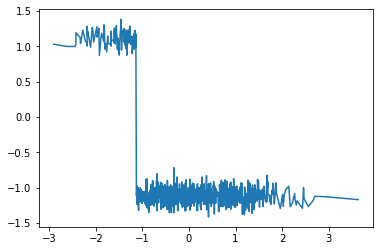

epochs: 155, train loss: 0.5530724041163921 validation loss: 0.46306735277175903
epochs: 293, train loss: 0.01492039521690458 validation loss: 0.01070189755409956
epochs: 170, train loss: 0.13849781826138496 validation loss: 0.10972094535827637
epochs: 273, train loss: 0.014909397112205625 validation loss: 0.010633094236254692
epochs: 292, train loss: 0.015001704101450741 validation loss: 0.010802634060382843
epochs: 468, train loss: 0.015317290788516402 validation loss: 0.010731382295489311
epochs: 461, train loss: 0.012750281603075564 validation loss: 0.010591239668428898
epochs: 436, train loss: 0.014006839832291007 validation loss: 0.010574566200375557
epochs: 514, train loss: 0.012652887380681932 validation loss: 0.010563366115093231
epochs: 565, train loss: 0.011991038685664535 validation loss: 0.010626278817653656


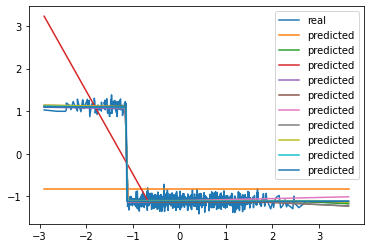

(1, 1000, 1)
(1, 1000)


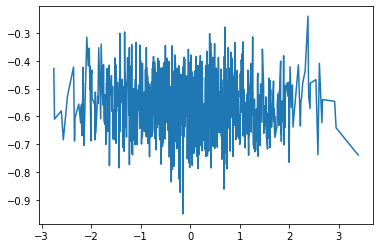

epochs: 278, train loss: 0.009939042967744172 validation loss: 0.009637417271733284
epochs: 382, train loss: 0.009940375573933125 validation loss: 0.009565362706780434
epochs: 288, train loss: 0.009876948315650225 validation loss: 0.009470172226428986
epochs: 112, train loss: 0.009954321663826704 validation loss: 0.009584058076143265
epochs: 742, train loss: 0.009932713932357728 validation loss: 0.00957096740603447
epochs: 143, train loss: 0.00994384370278567 validation loss: 0.0095352903008461
epochs: 152, train loss: 0.009921764605678618 validation loss: 0.009540490806102753
epochs: 103, train loss: 0.00996675412170589 validation loss: 0.009540153667330742
epochs: 107, train loss: 0.009930917993187904 validation loss: 0.009623605757951736
epochs: 159, train loss: 0.009926293627358973 validation loss: 0.009598709642887115


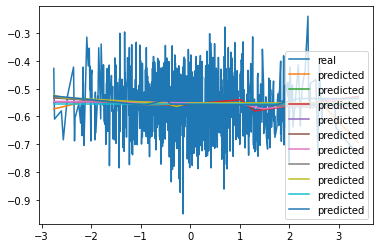

(1, 1000, 1)
(1, 1000)


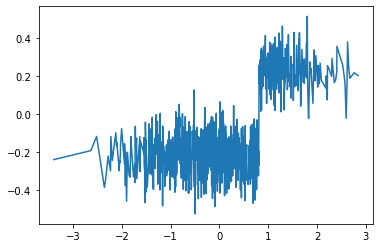

epochs: 307, train loss: 0.01025472697801888 validation loss: 0.010279711335897446
epochs: 105, train loss: 0.04571071546524763 validation loss: 0.04122362285852432
epochs: 426, train loss: 0.009988242527469993 validation loss: 0.009858876466751099
epochs: 106, train loss: 0.045706420205533504 validation loss: 0.04120233282446861
epochs: 237, train loss: 0.010271689505316317 validation loss: 0.01011526770889759
epochs: 229, train loss: 0.01923968642950058 validation loss: 0.020576491951942444
epochs: 287, train loss: 0.010203010402619839 validation loss: 0.01001553051173687
epochs: 325, train loss: 0.010257147252559662 validation loss: 0.010170439258217812
epochs: 210, train loss: 0.010234029730781913 validation loss: 0.010059582069516182
epochs: 266, train loss: 0.010214106878265738 validation loss: 0.009882815182209015


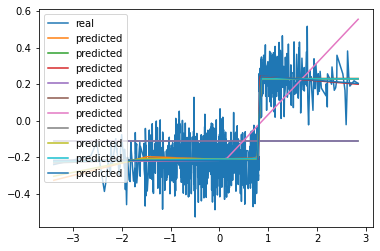

(1, 1000, 1)
(1, 1000)


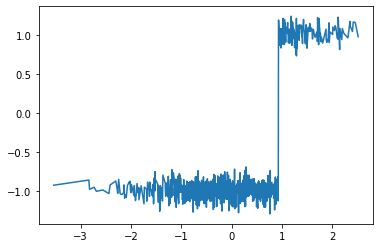

epochs: 466, train loss: 0.01812905934639275 validation loss: 0.007416685111820698
epochs: 686, train loss: 0.01895429886644706 validation loss: 0.007207116577774286
epochs: 558, train loss: 0.018731872783973813 validation loss: 0.007530479691922665
epochs: 100, train loss: 0.6180009320378304 validation loss: 0.5961644053459167
epochs: 110, train loss: 0.6180002242326736 validation loss: 0.5966321229934692
epochs: 657, train loss: 0.017149088729638606 validation loss: 0.007330089341849089
epochs: 382, train loss: 0.019197234185412526 validation loss: 0.0083543062210083
epochs: 136, train loss: 0.6179278828203678 validation loss: 0.5965478420257568
epochs: 794, train loss: 0.016488410183228552 validation loss: 0.0073662083595991135
epochs: 119, train loss: 0.6179561242461205 validation loss: 0.5965193510055542


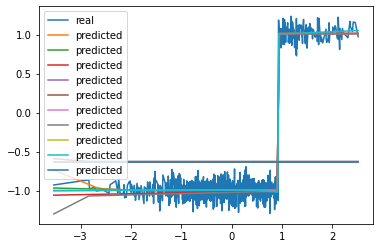

(1, 1000, 1)
(1, 1000)


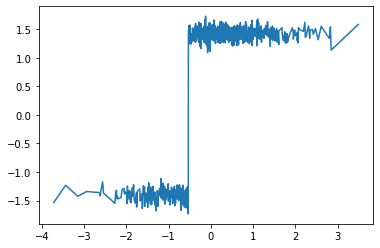

epochs: 611, train loss: 0.017817419720813632 validation loss: 0.025623340159654617
epochs: 500, train loss: 0.018470638897269964 validation loss: 0.025915322825312614
epochs: 511, train loss: 0.018548267777077854 validation loss: 0.025461312383413315
epochs: 142, train loss: 1.7186438590288162 validation loss: 1.5672354698181152
epochs: 433, train loss: 0.01840223406907171 validation loss: 0.026494944468140602
epochs: 567, train loss: 0.018322724383324385 validation loss: 0.025928305462002754
epochs: 505, train loss: 0.018356545828282833 validation loss: 0.026260200887918472
epochs: 1000, train loss: 0.03022817790042609 validation loss: 0.037337254732847214
epochs: 519, train loss: 0.017999250325374305 validation loss: 0.025970999151468277
epochs: 596, train loss: 0.018517820979468524 validation loss: 0.025279032066464424


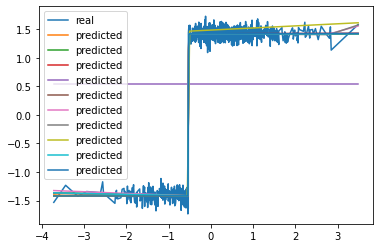

In [104]:
for _ in range(5):
    (an, bn) = generate.generate_activations(d, N)
    (In, thetan) = generate.generate_single_layer(N, M, d, num, an, bn)
    (X, Y) = generate.generate_single_data(T, an, bn, In, thetan)
    print(X.shape)
    print(Y.shape)
    plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
    plt.show()
    num_experiments = 10
    input = X[0]
    plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
    for i in range(num_experiments):
        (model, epoch_number, best_vloss, train_loss) = train_one_model(
            hidden_dim, X[0], Y[0], 
            val_ratio=0.2, 
            lr=lr, 
            patience=100, 
            epochs=1000,
        )
        print(f"epochs: {epoch_number}, train loss: {train_loss} validation loss: {best_vloss}")
        predicted = model(torch.Tensor(X[0])).detach().numpy()
        plt.plot(*zip(*sorted(zip(X[0], predicted))))
    plt.legend(["real"] + ["predicted"] * num_experiments)
    plt.show()


## Experiment 3
- Data Generation: R1 -> R1, with only one activation unit
- model 
    - hidden_dim: [100]
    - lr: 0.01

In [105]:
# Constants
d = 1
N = 3#int(np.exp(d))
M = d 
num = 1
T = 1000

lr = 0.01
hidden_dim = [100]

(1, 1000, 1)
(1, 1000)


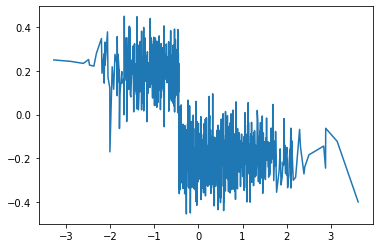

epochs: 1000, train loss: 0.009722415124997497 validation loss: 0.009416818618774414
epochs: 501, train loss: 0.010785493766888976 validation loss: 0.009693561121821404
epochs: 964, train loss: 0.00972840451868251 validation loss: 0.009366948157548904
epochs: 695, train loss: 0.009777573868632317 validation loss: 0.009398182854056358
epochs: 1000, train loss: 0.009716176195070148 validation loss: 0.009410847909748554
epochs: 1000, train loss: 0.009694665262941271 validation loss: 0.00933840125799179
epochs: 845, train loss: 0.00971915404079482 validation loss: 0.00937911868095398
epochs: 747, train loss: 0.009787484654225409 validation loss: 0.009424988180398941
epochs: 852, train loss: 0.009805476700421423 validation loss: 0.009392086416482925
epochs: 675, train loss: 0.010633708210662007 validation loss: 0.009701386094093323


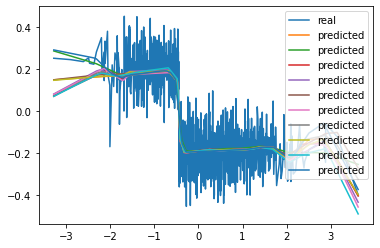

(1, 1000, 1)
(1, 1000)


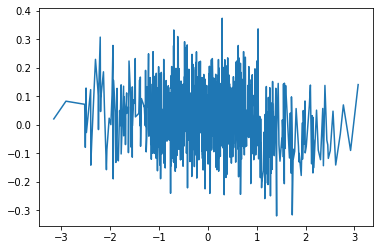

epochs: 107, train loss: 0.010325654759071767 validation loss: 0.012073975056409836
epochs: 107, train loss: 0.010295816347934306 validation loss: 0.012057340703904629
epochs: 108, train loss: 0.010578957968391478 validation loss: 0.012083299458026886
epochs: 103, train loss: 0.010538920294493437 validation loss: 0.012081041932106018
epochs: 112, train loss: 0.010384954162873328 validation loss: 0.012090198695659637
epochs: 105, train loss: 0.010969155700877309 validation loss: 0.012075381353497505
epochs: 108, train loss: 0.010941286222077906 validation loss: 0.01213299110531807
epochs: 108, train loss: 0.010546153178438544 validation loss: 0.012150765396654606
epochs: 106, train loss: 0.010420780745334923 validation loss: 0.012086194008588791
epochs: 102, train loss: 0.010334681952372193 validation loss: 0.012060621753334999


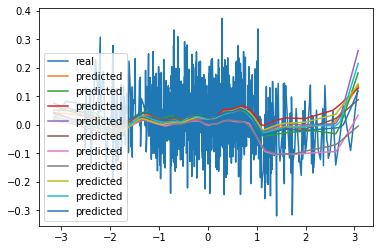

(1, 1000, 1)
(1, 1000)


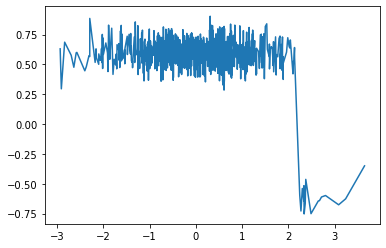

epochs: 189, train loss: 0.01566606725100428 validation loss: 0.017067832872271538
epochs: 136, train loss: 0.016054693260230124 validation loss: 0.017430299893021584
epochs: 202, train loss: 0.015405760612338781 validation loss: 0.01704055443406105
epochs: 498, train loss: 0.010115905897691846 validation loss: 0.01192985475063324
epochs: 183, train loss: 0.015776805463247 validation loss: 0.017430832609534264
epochs: 235, train loss: 0.015385443810373545 validation loss: 0.01666385866701603
epochs: 126, train loss: 0.01585108763538301 validation loss: 0.017390215769410133
epochs: 107, train loss: 0.01565320580266416 validation loss: 0.01868242397904396
epochs: 115, train loss: 0.015650732326321304 validation loss: 0.017610281705856323
epochs: 839, train loss: 0.010012193233706057 validation loss: 0.011084005236625671


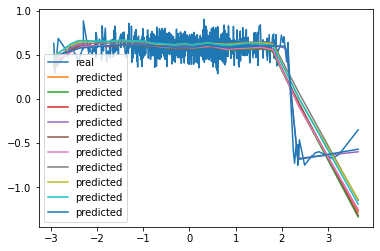

(1, 1000, 1)
(1, 1000)


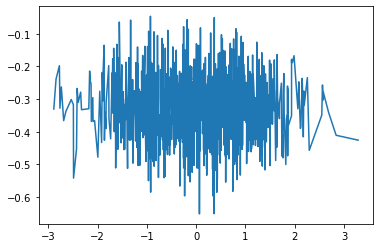

epochs: 106, train loss: 0.010208644845988601 validation loss: 0.010813262313604355
epochs: 279, train loss: 0.010049201198853552 validation loss: 0.010954832658171654
epochs: 107, train loss: 0.0102879527839832 validation loss: 0.010933544486761093
epochs: 237, train loss: 0.010157144686672837 validation loss: 0.010966687463223934
epochs: 300, train loss: 0.009951905522029847 validation loss: 0.010934988968074322
epochs: 108, train loss: 0.01028166979085654 validation loss: 0.010973338969051838
epochs: 106, train loss: 0.010163584433030337 validation loss: 0.010871992446482182
epochs: 106, train loss: 0.010238053509965539 validation loss: 0.010909457691013813
epochs: 105, train loss: 0.010372712335083634 validation loss: 0.010829275473952293
epochs: 107, train loss: 0.010164124018047005 validation loss: 0.010871423408389091


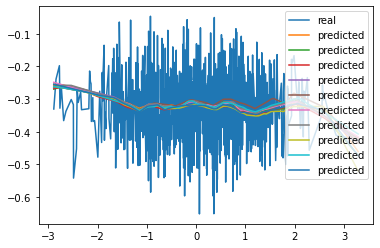

(1, 1000, 1)
(1, 1000)


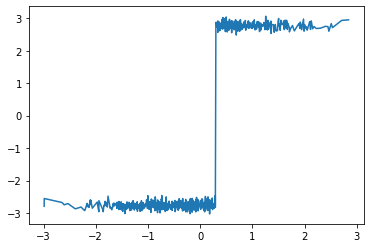

epochs: 1000, train loss: 0.0457961835199967 validation loss: 0.0647992268204689
epochs: 1000, train loss: 0.048047879710793495 validation loss: 0.06771739572286606
epochs: 1000, train loss: 0.06336633337195963 validation loss: 0.0934944599866867
epochs: 1000, train loss: 0.07031109859235585 validation loss: 0.08681078255176544
epochs: 1000, train loss: 0.06406127265654504 validation loss: 0.09409549832344055
epochs: 1000, train loss: 0.046423988067545 validation loss: 0.06564806401729584
epochs: 1000, train loss: 0.06821314140688628 validation loss: 0.09278584271669388
epochs: 1000, train loss: 0.06735764641780406 validation loss: 0.0930180549621582
epochs: 1000, train loss: 0.04629672726150602 validation loss: 0.06633910536766052
epochs: 1000, train loss: 0.04781421693041921 validation loss: 0.06679970026016235


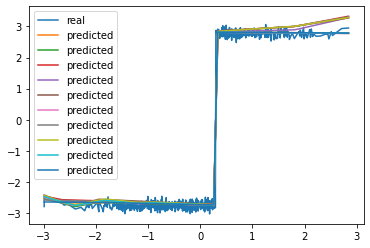

In [106]:
for _ in range(5):
    (an, bn) = generate.generate_activations(d, N)
    (In, thetan) = generate.generate_single_layer(N, M, d, num, an, bn)
    (X, Y) = generate.generate_single_data(T, an, bn, In, thetan)
    print(X.shape)
    print(Y.shape)
    plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
    plt.show()
    num_experiments = 10
    input = X[0]
    plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
    for i in range(num_experiments):
        (model, epoch_number, best_vloss, train_loss) = train_one_model(
            hidden_dim, X[0], Y[0], 
            val_ratio=0.2, 
            lr=lr, 
            patience=100, 
            epochs=1000,
        )
        print(f"epochs: {epoch_number}, train loss: {train_loss} validation loss: {best_vloss}")
        predicted = model(torch.Tensor(X[0])).detach().numpy()
        plt.plot(*zip(*sorted(zip(X[0], predicted))))
    plt.legend(["real"] + ["predicted"] * num_experiments)
    plt.show()


## Experiment 4
- Data Generation: R1 -> R1, with only one activation unit
- model 
    - hidden_dim: [100]
    - lr: 0.01

In [108]:
# Constants
d = 1
N = 3#int(np.exp(d))
M = d 
num = 1
T = 1000

lr = 0.01
hidden_dim = [2, 4, 2]

(1, 1000, 1)
(1, 1000)


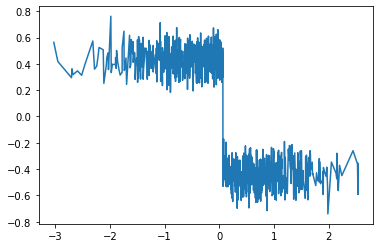

epochs: 356, train loss: 0.010364467278122902 validation loss: 0.01393270306289196
epochs: 396, train loss: 0.010195954702794552 validation loss: 0.013722204603254795
epochs: 100, train loss: 0.19807187840342522 validation loss: 0.2049676775932312
epochs: 351, train loss: 0.010191946406848729 validation loss: 0.013796273618936539
epochs: 332, train loss: 0.010239517083391547 validation loss: 0.012950602918863297
epochs: 113, train loss: 0.1980554312467575 validation loss: 0.2068181335926056
epochs: 353, train loss: 0.010346476687118411 validation loss: 0.014187266118824482
epochs: 122, train loss: 0.1980514321476221 validation loss: 0.2070702314376831
epochs: 110, train loss: 0.19805152900516987 validation loss: 0.2041231393814087
epochs: 422, train loss: 0.010501811048015952 validation loss: 0.01373438723385334


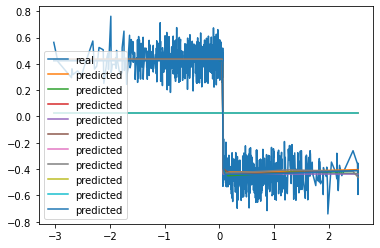

(1, 1000, 1)
(1, 1000)


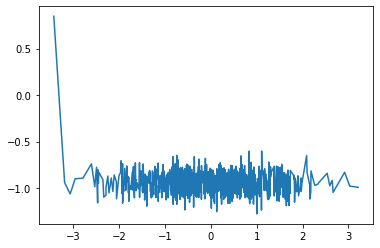

epochs: 113, train loss: 0.01440213609021157 validation loss: 0.012129396200180054
epochs: 127, train loss: 0.013844504719600081 validation loss: 0.012213971465826035
epochs: 112, train loss: 0.014416930498555303 validation loss: 0.012093953788280487
epochs: 147, train loss: 0.014399523730389774 validation loss: 0.012127685360610485
epochs: 124, train loss: 0.014383049332536757 validation loss: 0.012093898840248585
epochs: 198, train loss: 0.014410775038413703 validation loss: 0.012550462037324905
epochs: 111, train loss: 0.014398023718968034 validation loss: 0.012123377062380314
epochs: 137, train loss: 0.014097529114224017 validation loss: 0.012079516425728798
epochs: 114, train loss: 0.014408653369173408 validation loss: 0.01209990493953228
epochs: 444, train loss: 0.01041472121141851 validation loss: 0.01232018880546093


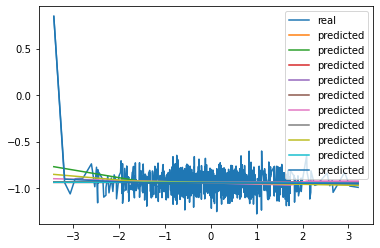

(1, 1000, 1)
(1, 1000)


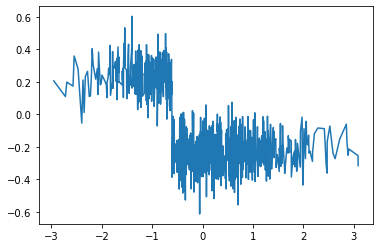

epochs: 115, train loss: 0.05340153118595481 validation loss: 0.05139194801449776
epochs: 855, train loss: 0.05342713836580515 validation loss: 0.05139012262225151
epochs: 411, train loss: 0.011665184400044382 validation loss: 0.00900831539183855
epochs: 110, train loss: 0.053419956006109715 validation loss: 0.051389504224061966
epochs: 109, train loss: 0.053406795021146536 validation loss: 0.051391519606113434
epochs: 1000, train loss: 0.05342693813145161 validation loss: 0.051390133798122406
epochs: 428, train loss: 0.011704148259013891 validation loss: 0.009046243503689766
epochs: 334, train loss: 0.011544575216248631 validation loss: 0.009097311645746231
epochs: 277, train loss: 0.011431619990617037 validation loss: 0.008993126451969147
epochs: 275, train loss: 0.011670612031593919 validation loss: 0.009040061384439468


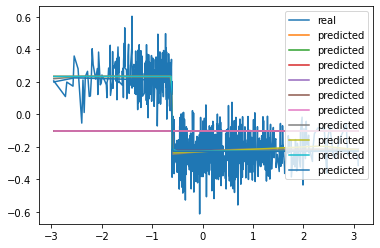

(1, 1000, 1)
(1, 1000)


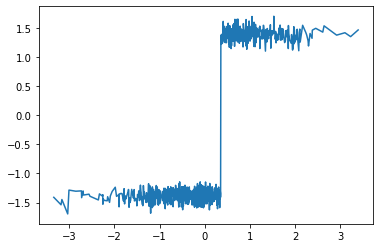

epochs: 107, train loss: 1.8294002264738083 validation loss: 1.8069329261779785
epochs: 501, train loss: 0.012507183128036559 validation loss: 0.009616903029382229
epochs: 374, train loss: 0.013671259512193501 validation loss: 0.011026183143258095
epochs: 970, train loss: 0.009832786279730499 validation loss: 0.00958326831459999
epochs: 520, train loss: 0.010732527065556496 validation loss: 0.009666234254837036
epochs: 108, train loss: 1.829392910003662 validation loss: 1.8069336414337158
epochs: 384, train loss: 0.013770561083219945 validation loss: 0.009713351726531982
epochs: 444, train loss: 0.012468577362596989 validation loss: 0.009724467992782593
epochs: 452, train loss: 0.012316735344938934 validation loss: 0.009675011038780212
epochs: 387, train loss: 0.011997579596936703 validation loss: 0.00990871712565422


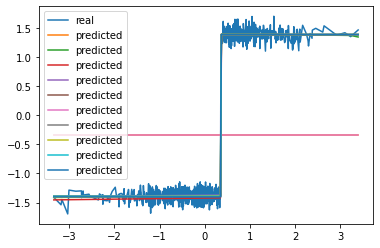

(1, 1000, 1)
(1, 1000)


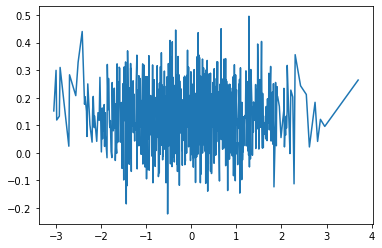

epochs: 229, train loss: 0.010927345254458487 validation loss: 0.00963235180824995
epochs: 114, train loss: 0.010936175705865026 validation loss: 0.009719839319586754
epochs: 115, train loss: 0.010931699653156102 validation loss: 0.009503750130534172
epochs: 325, train loss: 0.011031491099856794 validation loss: 0.009620830416679382
epochs: 107, train loss: 0.011038446915335953 validation loss: 0.009559039026498795
epochs: 101, train loss: 0.010867004632018507 validation loss: 0.00955984927713871
epochs: 109, train loss: 0.0109516839729622 validation loss: 0.009546609595417976
epochs: 219, train loss: 0.010984181542880833 validation loss: 0.00962824933230877
epochs: 105, train loss: 0.010883730254136026 validation loss: 0.009546447545289993
epochs: 109, train loss: 0.010948029696010053 validation loss: 0.009504299610853195


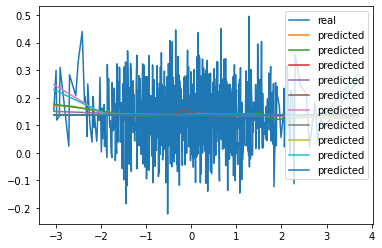

In [109]:
for _ in range(5):
    (an, bn) = generate.generate_activations(d, N)
    (In, thetan) = generate.generate_single_layer(N, M, d, num, an, bn)
    (X, Y) = generate.generate_single_data(T, an, bn, In, thetan)
    print(X.shape)
    print(Y.shape)
    plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
    plt.show()
    num_experiments = 10
    input = X[0]
    plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
    for i in range(num_experiments):
        (model, epoch_number, best_vloss, train_loss) = train_one_model(
            hidden_dim, X[0], Y[0], 
            val_ratio=0.2, 
            lr=lr, 
            patience=100, 
            epochs=1000,
        )
        print(f"epochs: {epoch_number}, train loss: {train_loss} validation loss: {best_vloss}")
        predicted = model(torch.Tensor(X[0])).detach().numpy()
        plt.plot(*zip(*sorted(zip(X[0], predicted))))
    plt.legend(["real"] + ["predicted"] * num_experiments)
    plt.show()


## Experiment 5
- Data Generation: R^10 -> R1, with only one activation unit
- model 
    - hidden_dim: [100]
    - lr: 0.01

In [110]:
# Constants
d = 10
N = int(np.exp(d))
M = d 
num = 1
T = 4096

lr = 0.01
hidden_dim = [100]

In [111]:
(an, bn) = generate.generate_activations(d, N) 
(In, thetan) = generate.generate_single_layer(N, M, d, num, an, bn)
(X, Y) = generate.generate_single_data(T, an, bn, In, thetan)
print(X.shape)
print(Y.shape)


(1, 4096, 10)
(1, 4096)


In [112]:
# plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
# plt.show()
num_experiments = 10
input = X[0]
# plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
for i in range(num_experiments):
    (model, epoch_number, best_vloss, train_loss) = train_one_model(
        hidden_dim, X[0], Y[0], 
        val_ratio=0.2, 
        lr=lr, 
        patience=100, 
        epochs=1000,
    )
    print(f"epochs: {epoch_number}, train loss: {train_loss}, validation loss: {best_vloss}")
    predicted = model(torch.Tensor(X[0])).detach().numpy()
    # plt.plot(*zip(*sorted(zip(X[0], predicted))))
# plt.legend(["real"] + ["predicted"] * num_experiments)
# plt.show()


epochs: 358, train loss: 0.03384822629617922, validation loss: 0.06355629861354828
epochs: 338, train loss: 0.02867789123433106, validation loss: 0.05502207577228546
epochs: 311, train loss: 0.02993775802579793, validation loss: 0.05858941748738289
epochs: 361, train loss: 0.031049402204878403, validation loss: 0.05477990210056305
epochs: 312, train loss: 0.028880618569074257, validation loss: 0.06131375581026077
epochs: 244, train loss: 0.02971177390127471, validation loss: 0.06039553880691528
epochs: 241, train loss: 0.0458577357684121, validation loss: 0.06278011202812195
epochs: 170, train loss: 0.03505037013779987, validation loss: 0.0724382996559143
epochs: 280, train loss: 0.034413292157379066, validation loss: 0.06500542163848877
epochs: 511, train loss: 0.028183950619264084, validation loss: 0.05888614431023598


In [113]:
# plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
# plt.show()
num_experiments = 10
input = X[0]
# plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
for i in range(num_experiments):
    (model, epoch_number, best_vloss, train_loss) = train_one_model(
        [32, 32], X[0], Y[0], 
        val_ratio=0.2, 
        lr=lr, 
        patience=100, 
        epochs=1000,
    )
    print(f"epochs: {epoch_number}, train loss: {train_loss}, validation loss: {best_vloss}")
    predicted = model(torch.Tensor(X[0])).detach().numpy()
    # plt.plot(*zip(*sorted(zip(X[0], predicted))))
# plt.legend(["real"] + ["predicted"] * num_experiments)
# plt.show()


epochs: 240, train loss: 0.016237515984385303, validation loss: 0.04405130445957184
epochs: 271, train loss: 0.019412752692446564, validation loss: 0.04075233265757561
epochs: 336, train loss: 0.017832784603039425, validation loss: 0.04378659278154373
epochs: 413, train loss: 0.017532995196454453, validation loss: 0.04245849326252937
epochs: 219, train loss: 0.018423037180169063, validation loss: 0.03743588551878929
epochs: 215, train loss: 0.01942468290640549, validation loss: 0.048819564282894135
epochs: 277, train loss: 0.021579927369726425, validation loss: 0.038989871740341187
epochs: 439, train loss: 0.01470977355810729, validation loss: 0.03931259363889694
epochs: 218, train loss: 0.023004228926517746, validation loss: 0.038235779851675034
epochs: 358, train loss: 0.017204489333159996, validation loss: 0.03572642058134079
